# Connect to upstream components

This notebook shows a new functionality of the tool to connect the input gene list. Instead of looking for a path, as the default connecting strategy of the tool, this functionality aims to find those upstream regulators that regulate as many of the input genes.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 14.4 s, sys: 626 ms, total: 15 s
Wall time: 16.3 s


## 1. Import CollecTRI interactions from Omnipath

In [2]:
interactions = op.interactions.CollecTRI.get()

0.00B [00:00, ?B/s]

In [3]:
resources = Resources()
resources.add_database(interactions)

## 2. Define the nodes of interest and create network object with CollecTRI interactions

In [4]:
genes = ["SRC", "NOTCH1", "CDH1", "CDH2", "VIM", "LATS1", "LATS2"]

In [5]:
new_net1 = Network(genes, resources = resources.interactions)

## 3. Connect nodes to upstream regulators

The `connect_to_upstream_nodes` looks for the regulators of each of the input nodes, and ranks each of the regulators based on the number of the input nodes they regulate. 

The `rank` argument refers to the number of the ranked regulators that should be included in the network
The `depth` argument refers to how many steps away from the input nodes the algorithm should go. The higher the number the more regulatory layers will be included in the final network.

In [6]:
%%time
new_net1.connect_to_upstream_nodes(rank = 1, depth=1)

CPU times: user 1.4 s, sys: 11.9 ms, total: 1.41 s
Wall time: 1.88 s


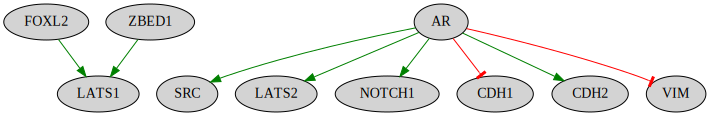

In [7]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()